In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Bit Torrent

In this problem, we will reconsider aspects of problem 3 from THW3. 

### 1. a) Create a simulator

Create a function called `download_file` which performs a simulation of the download process described in the THW3. The function should take an argument, `m`, indicating the number of chunks into which the file is divided. At each step, any of the `m` chunks is equally likely to be downloaded, even if it has been previously downloaded (imagine that the only way to see which chunk is contained on a server to to download the chunk). The function should return an array called `first_seen` which contains the steps on which each chunk of the file was first seen. For example, if the 1st chunk was first seen on the 4th step, then the first element (at index 0) of the array should be assigned to 4. If the 2nd chunk was first seen on the 18th step, then the second element (at index 1) should be assigned to 18. And so on.

Run the simulated function a large number (e.g. $N=50000$) times with $m=10$, and save the results in a $N \times m$ numpy array.

In [0]:
def download_file(m=10):
    step = 1
    first_seen = np.zeros((m), dtype=int)
    while 0 in first_seen:
      chunk = np.random.randint(0,m)
      if (first_seen[chunk]==0):
        first_seen[chunk] = step
      step += 1
    return first_seen  

In [0]:
N = 50000
m = 10

In [0]:
results = np.array([download_file() for _ in range(N)])

### 1. b) Compare the theoretical and empirical distribution for time to see 1 chunk

Let $X$ be the step on which chunk number 1 is first seen. How is $X$ distributed? Use the samples from part a) to empircally estimate $P(X)$. Plot  the empirical distribution and the theoretical distribution together on the same graph, and confirm that they agree. 

In [0]:
# Compare the empirical and theoretical distribution
x_dist = [x[0] for x in results]
x_vals, x_freqs = np.unique(x_dist, return_counts=True)
x_probs = x_freqs / N

In [0]:
theo_vals = np.arange(1, np.amax(x_vals)+1)
theo_probs = np.array([((1.0-.1)**(x-1)*.1) for x in theo_vals])

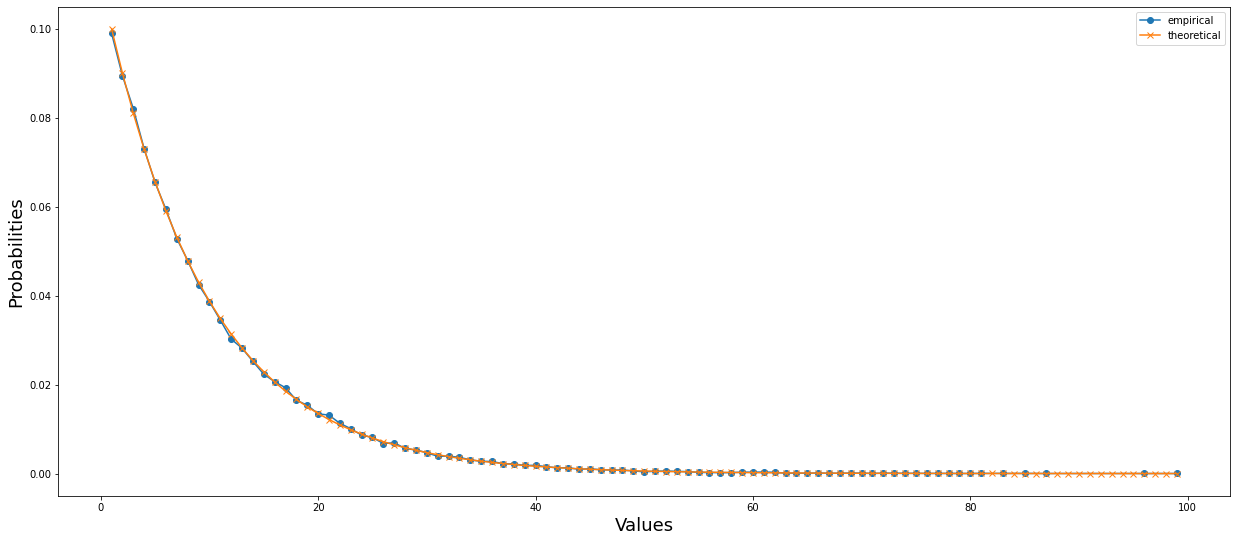

In [20]:
fig, ax = plt.subplots()
rect1 = ax.plot(x_vals, x_probs, label="empirical", marker="o")
rect2 = ax.plot(theo_vals, theo_probs, label="theoretical", marker="x")
ax.legend()
ax.set_ylabel("Probabilities", fontsize=18)
ax.set_xlabel("Values", fontsize=18)
fig.set_size_inches(21, 9)
plt.show()

### 1. c) Theoretical vs Empirical Expected Values

Empirically estimate the expected values of the following random variables: 
- X, the number of steps to see the first chunk
- Y, the number of steps to see the first and second chunks
- Z, the number of steps to see all chunks
 
For each empirical estimate, also give the theoretical value (You found the first two in your homework; the third was covered during the THW3 recitation)

In [0]:
# compute Y
y_dist = np.array([np.amax(x) for x in np.array([x[0:2] for x in results])])
y_vals, y_freqs = np.unique(y_dist, return_counts=True)
y_probs = y_freqs / N

# compute Z
z_dist = np.array([np.amax(x) for x in results])
z_vals, z_freqs = np.unique(z_dist, return_counts=True)
z_probs = z_freqs / N

In [22]:
# Compare the theoretical and empirical expected value
exp_x = m
emp_x = np.sum(x_vals*x_probs)

exp_y = 3 * m / 2 
emp_y = np.sum(y_vals*y_probs)

exp_z = np.sum(np.array([m/(m-x) for x in range(m)]))
emp_z = np.sum(z_vals*z_probs)

# Number of steps to see the first chunk
print('Theory (E[X]):', exp_x)
print('Empirical:', emp_x,'\n')

# Number of steps to see the first and second chunks
print('Theory (E[Y]):', exp_y)
print('Empirical:',emp_y, '\n')

# Number of steps to see all chunks
print('Theory (E[Z]):', exp_z)
print('Empirical:', emp_z,'\n')

Theory (E[X]): 10
Empirical: 10.06034 

Theory (E[Y]): 15.0
Empirical: 15.035779999999999 

Theory (E[Z]): 29.289682539682538
Empirical: 29.27246 



### 1. d) Memorylessness, pt. 1
In THW3, 3.c), you used the property, known as the "memoryless" property, of a geometric variable that 
$$P(X-t=s|X>t) = P(X=s).$$
We will know use the simulation to verify this property. 

As above, let $X$ be the number of steps needed to see the first chunk of a file. Suppose that you have downloaded the first 10 chunks of a file, and none of them is the first chunk. Let us define a new random variable, $\tilde{X}$, representing the number of remaining steps before we see the first chunk. Note that $\tilde{X} = X - 10$. Since we know that $X > 10$, the equation above tells us that 

$$P(\tilde{X}=s|X>10) = P(X-10=s|X>10) = P(X=s)$$

For each of the samples generated in part a), calculate $X$. Keep all of the samples with $X>10$ and discard the ones with $X\leq10$. Then, subtract 10 from each value of $X$. These new values represent a sample of $\tilde{X}$. Estimate the empirical mean of $\tilde{X}$. Plot the **pmf** of the samples of $\tilde{X}$. How do they compare to those of $X$?

In [0]:
x_bar = np.array([x - 10 for x in x_dist if x > 10])
x_bar_mean = np.mean(x_bar)
x_bar_vals, x_bar_freqs = np.unique(x_bar, return_counts=True)
x_bar_probs = x_bar_freqs / len(x_bar)

In [24]:
print(x_bar_freqs)

[1725 1512 1410 1261 1117 1033  965  825  768  672  657  565  505  432
  406  338  346  283  265  235  194  196  183  154  138  136  111  109
   91   93   77   65   66   48   54   43   40   40   30   20   26   29
   25   22   13   12   10   11   16   16   17   15    4    5    3    7
    3    4    5    5    1    5    4    3    3    2    2    2    1    1
    2    2    2    1    1    1]


In [25]:
print("Mean of X bar: ", x_bar_mean)

Mean of X bar:  10.122534164331865


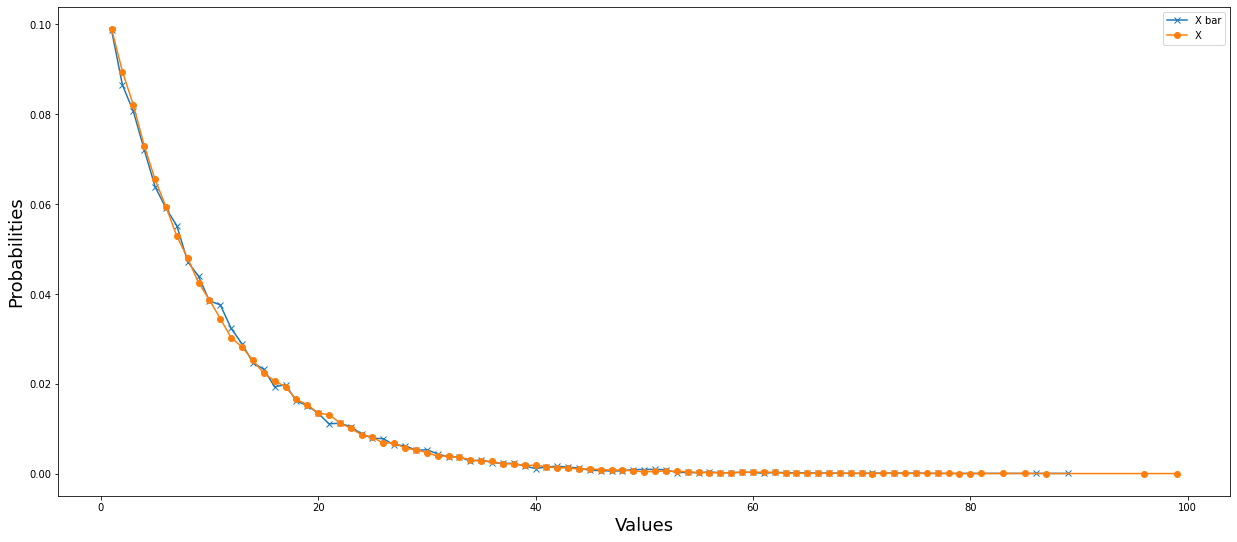

In [26]:
fig, ax = plt.subplots()
rect1 = ax.plot(x_bar_vals, x_bar_probs, label="X bar", marker='x')
rect2 = ax.plot(x_vals, x_probs, label="X", marker='o')
ax.legend()
ax.set_ylabel("Probabilities", fontsize=18)
ax.set_xlabel("Values", fontsize=18)
fig.set_size_inches(21, 9)
plt.show()

These values are nearly identical to those presented in the previous task.

### 1. e) Memorylessness, pt. 2

Let us now consider the random variable, $Y$, representing the number of steps needed to see both the first and second chunks. Let us check whether this random variable is memoryless. 

For each of the samples generated in part a), calculate $Y$. Keep all of the samples with $Y>10$ and discard the ones with $Y\leq10$. Then, subtract 10 from each value of $Y$. These new values represent a sample of $\tilde{Y}$. Plot the **pmf** of the samples of $\tilde{Y}$ and compare with the **pmf** of $Y$. Can you explain why this distribution is not memoryless?

In [0]:
#compute y bar, the unique values and frequencies as well as the probabilities of each
y_bar = [y-10 for y in y_dist if y > 10]
y_bar_vals, y_bar_freqs = np.unique(y_bar, return_counts=True)
y_bar_probs = y_bar_freqs / len(y_bar)

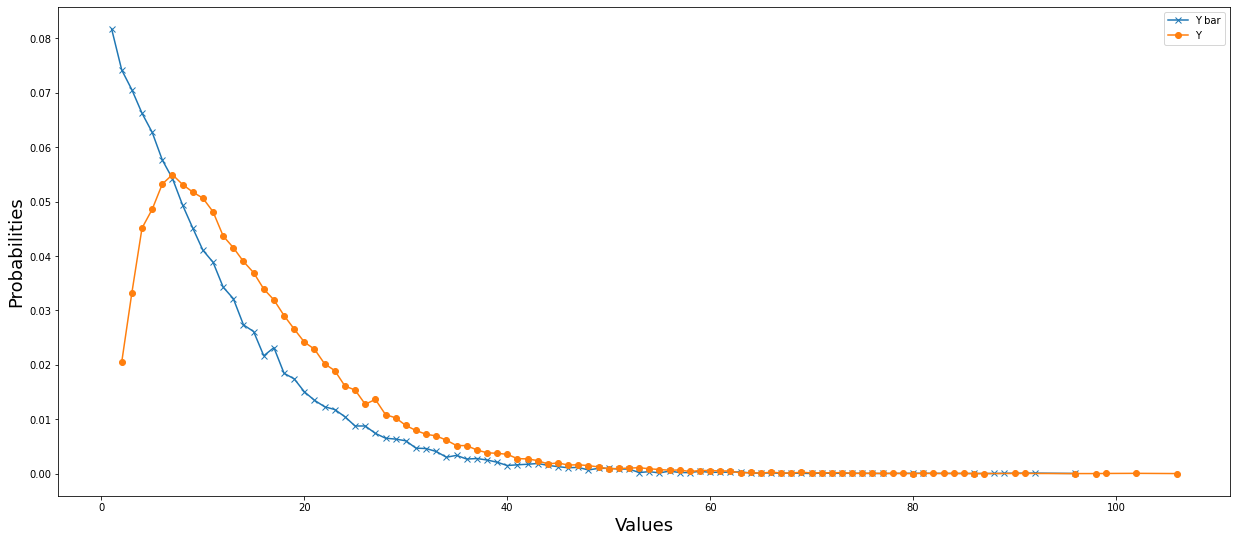

In [28]:
#plot the pmf of y_bar
fig, ax = plt.subplots()
rect1 = ax.plot(y_bar_vals, y_bar_probs, label="Y bar", marker='x')
rect2 = ax.plot(y_vals, y_probs, label="Y", marker='o')
ax.legend()
ax.set_ylabel("Probabilities", fontsize=18)
ax.set_xlabel("Values", fontsize=18)
fig.set_size_inches(21, 9)
plt.show()

This function is not memoryless, since the probability curve changes when the starting value of time has changed.

# 2. Law of Large Numbers

Let $X_i$ be a sequence of i.i.d random variables. Given $n$ measurements of $X_i$, we calculate the sample mean of the random variable as 

$$
\bar{X}_n = \frac{1}{N}\sum_1^N X_i
$$

The law of large numbers deals with the convergence of the sample mean to the expecation of the random variable $X_i$ as $n$ gets large. 

$$
\bar{X}_n \rightarrow E[X] \quad \text{as} \quad n \rightarrow \infty. 
$$

In this problem, we will consider the weak law of large numbers. The weak law of large numbers states that for any $\epsilon > 0$. 

$$
\lim_{n\rightarrow\infty} P(|\bar{X}_n - E[X]| > \epsilon) = 0
$$

This is known as convergence in probability. In words, it means that the probability that $\bar{X}_n$ is any positive distance from $E[X]$ becomes arbitrarily small as $n$ becomes large. In mathematical terms, it means that for any $\epsilon > 0$ and $\delta > 0$, there exists an integer $N$ such that if $n \geq N$, then

$$
P(|\bar{X}_n - E[X]| > \epsilon) < \delta
$$

or, equivalently,

$$P(|\bar{X}_n - E[X]| \leq \epsilon) \geq 1-\delta$$

We can write $N = N(\epsilon,\delta)$ to emphasize that N is dependent on both $\epsilon$ and $\delta$. To see why, consider the following: For a fixed $n$, $\bar{X}_n$ will naturally have a certain amount of variability because it is a function of a finite random sample. Because of this variability, if we keep $n$ fixed and reduce $\epsilon$, the probability that $\bar{X}_n$ will be more than $\epsilon$ away from $E[X]$ increases. To keep $P(|\bar{X}_n - E[X]| > \epsilon)$ below $\delta$, we thus have to reduce the variability by increasing $n$.  

In this problem, we will empirically estimate the relationship between $N, \epsilon$, and $\delta$, for a few distributions.

### 2. a) Uniform Distribution
For a fixed value of $\epsilon$, we wish to find a relationship between $\delta$ and $N$. The above definitions imply that for every value of $\epsilon$, there exists a value of $N$. But we can also go in the reverse direction. For every value of $N$, we can find a corresponding $\delta$ such that $P(|\bar{X}_n - E[X]| > \epsilon) < \delta$ if $n \geq N$. Under the assumption that $P(|\bar{X}_n - E[X]| > \epsilon)$ decreases monotonically as $n$ increases, we can do this by just finding $\delta$ such that $P(|\bar{X}_n - E[X]| > \epsilon) = \delta$ when $n = N$.

So, how do we estimate $P(|\bar{X}_n - E[X]| > \epsilon)$ for a fixed value of $n$? As we have been doing, we need to sample $\bar{X}_n$ a large number of times, represented by $M$. We then estimate $P(|\bar{X}_n - E[X]| > \epsilon)$ as 

$$P(|\bar{X}_n - E[X]| > \epsilon) \approx \frac{\text{count}(|\bar{X}_n - E[X]| > \epsilon)}{M}$$

Write a function called `get_deltas` to estimate $\delta = P(|\bar{X}_n - E[X]| > \epsilon)$ for $n \in \{1,2,...,\text{max_n}\}$. Then use the function to calculate the relationship between $N$ and $\delta$ for $\epsilon \in \{0.1,0.05,0.01\}$. Create a plot which displays the relationship for each value of $\epsilon$. 

Use your plot to answer the following questions:
- How many samples are needed in order to have at least a 50% probability that our sample mean is within 0.01 of the true mean? Within 0.05 of the true mean?
- How many samples do we need in order for the sample mean to fall within 0.05 of the true mean with 80% probability? 90% probability?

In [0]:
# Uniform Distribution

def empirical_mean(dist,n=1000):
    return np.mean(dist(n))

def get_deltas(mu,dist,eps=0.1,M=1000,max_n=500):
    deltas = []
    for n in range(1, max_n):
      means = np.array([empirical_mean(dist, n) for _ in range(M)])
      deltas.append(np.mean((np.abs(means-mu) > eps).astype(np.float)))
    return deltas

In [0]:
mu = 0.5
dist = lambda size : np.random.uniform(0,1,size=size)

delta_0_1 = get_deltas(mu, dist, eps=0.1)
delta_0_05 = get_deltas(mu, dist, eps=0.05)
delta_0_01 = get_deltas(mu, dist, eps=0.01)

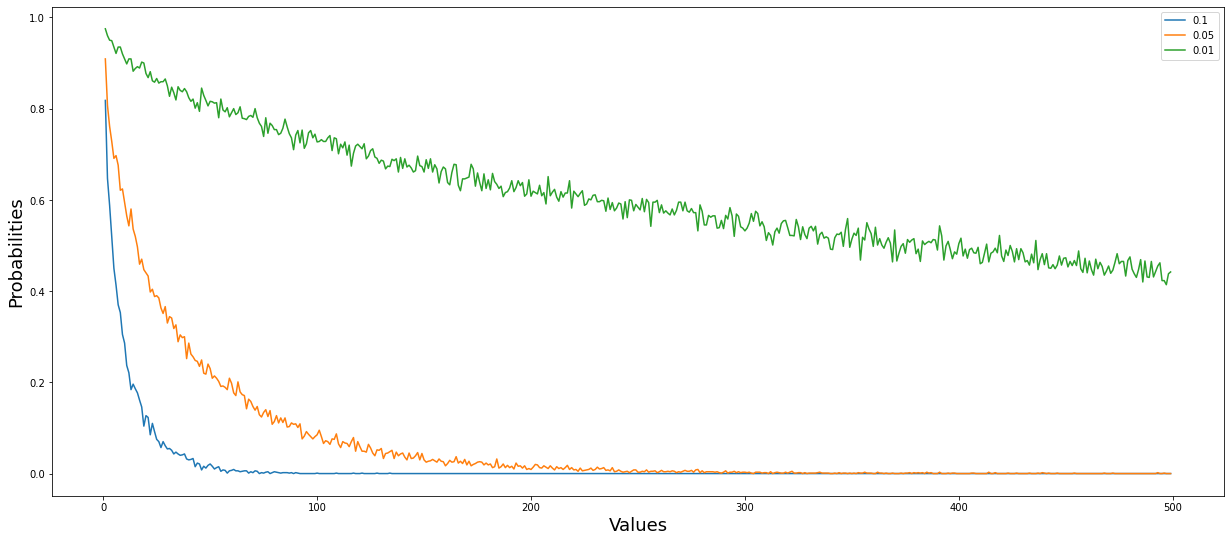

In [31]:
fig, ax = plt.subplots()
max_n = 500
n = np.arange(1, max_n)
ax.plot(n, delta_0_1, label = "0.1")
ax.plot(n, delta_0_05, label="0.05")
ax.plot(n, delta_0_01, label="0.01")
ax.legend()
ax.set_ylabel("Probabilities", fontsize=18)
ax.set_xlabel("Values", fontsize=18)
fig.set_size_inches(21, 9)
plt.show()

In [0]:
lt_50_eps_01 = np.array([x for x in range(len(delta_0_01)) if delta_0_01[x] < 0.5])[0]
lt_50_eps_05 = np.array([x for x in range(len(delta_0_05)) if delta_0_05[x] < 0.5])[0]

lt_20_eps_05 = np.array([x for x in range(len(delta_0_05)) if delta_0_05[x] < 0.2])[0]
lt_10_eps_05 = np.array([x for x in range(len(delta_0_05)) if delta_0_05[x] < 0.1])[0]

In [33]:
print("It takes ", lt_50_eps_01, " samples to guarantee that the sample mean has a 50% probability of being within 0.01 of the true mean")
print("It takes ", lt_50_eps_05, " samples to guarantee that the sample mean has a 50% probability of being within 0.05 of the true mean")
print("It takes ", lt_20_eps_05, " samples to guarantee that the sample mean has a 80% probability of being within 0.01 of the true mean")
print("It takes ", lt_10_eps_05, " samples to guarantee that the sample mean has a 90% probability of being within 0.01 of the true mean")

It takes  339  samples to guarantee that the sample mean has a 50% probability of being within 0.01 of the true mean
It takes  15  samples to guarantee that the sample mean has a 50% probability of being within 0.05 of the true mean
It takes  54  samples to guarantee that the sample mean has a 80% probability of being within 0.01 of the true mean
It takes  92  samples to guarantee that the sample mean has a 90% probability of being within 0.01 of the true mean


### 2. b) Bernoulli Distribution

Repeat part a) for a Bernoulli distribution with $p = 0.5$ and $p = 0.1$. As a reminder, a Bernoulli distribution gives 1 with probability $p$ and 0 with probability $1-p$. Explain any trends that you observe. 

In [0]:
bern = lambda p, size : np.random.binomial(1, p, size=size)

In [0]:
def empirical_mean(dist, p=0.5, n=1000):
    return np.mean(dist(p, n))

def get_deltas(mu,dist,p=0.5,eps=0.1,M=1000,max_n=500):
    deltas = []
    for n in range(1, max_n):
      means = np.array([empirical_mean(dist, p, n) for _ in range(M)])
      delta = np.mean((np.abs(means-mu) > eps).astype(np.float))
      deltas.append(delta)
    return deltas

In [0]:
delta_bern_05_01 =  get_deltas(mu, bern, eps=0.1, max_n=1000)
delta_bern_05_005 = get_deltas(mu, bern, eps=0.05, max_n=1000)
delta_bern_05_001 = get_deltas(mu, bern, eps=0.01, max_n=1000)

delta_bern_01_01 =  get_deltas(0.1, bern, p=0.1, eps=0.1, max_n=1000)
delta_bern_01_005 = get_deltas(0.1, bern, p=0.1, eps=0.05, max_n=1000)
delta_bern_01_001 = get_deltas(0.1, bern, p=0.1, eps=0.01, max_n=1000)

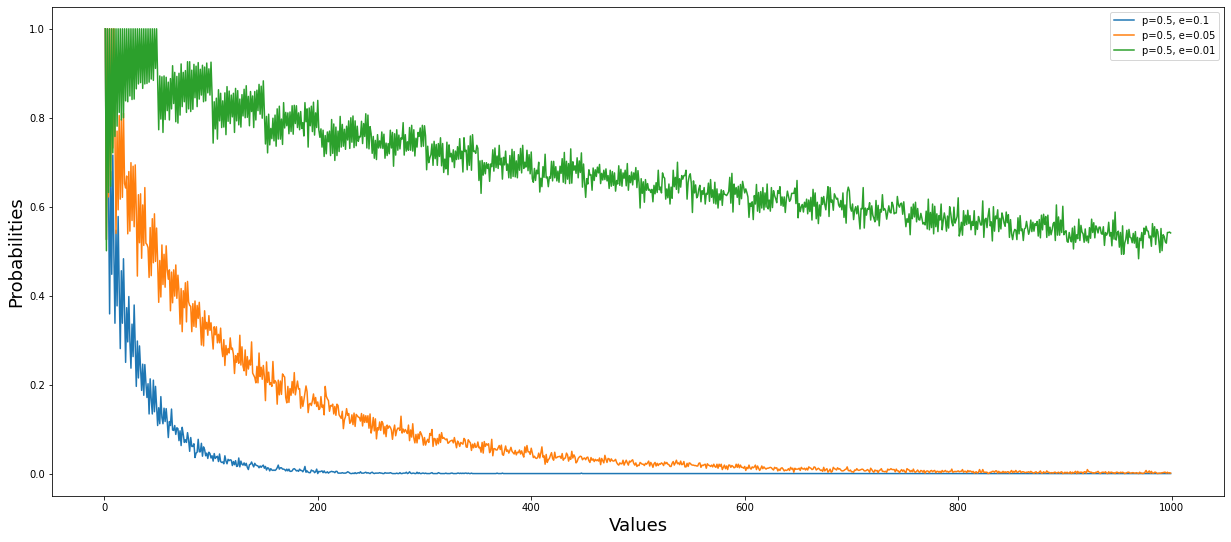

In [37]:
fig, ax = plt.subplots()
max_n = 1000
n = np.arange(1, max_n)
ax.plot(n, delta_bern_05_01, label = "p=0.5, e=0.1")
ax.plot(n, delta_bern_05_005, label="p=0.5, e=0.05")
ax.plot(n, delta_bern_05_001, label="p=0.5, e=0.01")
ax.legend()
ax.set_ylabel("Probabilities", fontsize=18)
ax.set_xlabel("Values", fontsize=18)
fig.set_size_inches(21, 9)
plt.show()

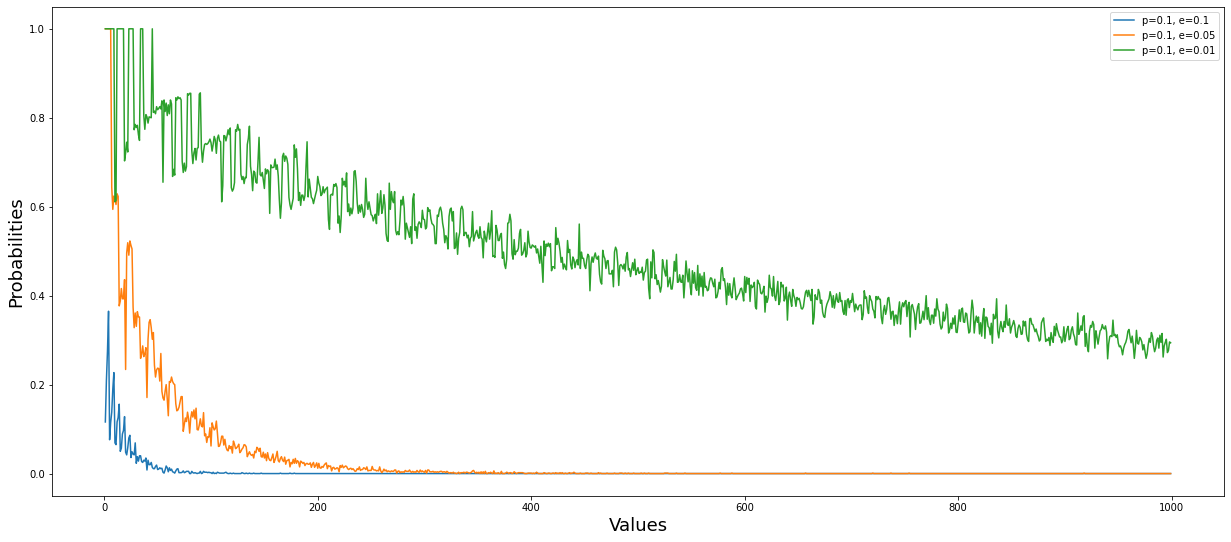

In [38]:
fig, ax = plt.subplots()
max_n = 1000
n = np.arange(1, max_n)
ax.plot(n, delta_bern_01_01, label = "p=0.1, e=0.1")
ax.plot(n, delta_bern_01_005, label="p=0.1, e=0.05")
ax.plot(n, delta_bern_01_001, label="p=0.1, e=0.01")
ax.legend()
ax.set_ylabel("Probabilities", fontsize=18)
ax.set_xlabel("Values", fontsize=18)
fig.set_size_inches(21, 9)
plt.show()

In [39]:
bern_p05_50p_eps01 = np.array([x for x in range(len(delta_bern_05_001)) if delta_bern_05_001[x] < 0.5])[0]
bern_p05_50p_eps05 = np.array([x for x in range(len(delta_bern_05_005)) if delta_bern_05_005[x] < 0.5])[0]
bern_p05_80p_eps05 = np.array([x for x in range(len(delta_bern_05_005)) if delta_bern_05_005[x] < 0.2])[0]
bern_p05_90p_eps05 = np.array([x for x in range(len(delta_bern_05_005)) if delta_bern_05_005[x] < 0.1])[0]
print("It takes ", bern_p05_50p_eps01, " samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 50% probability of being within 0.01 of the true mean")
print("It takes ", bern_p05_50p_eps05, " samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 50% probability of being within 0.05 of the true mean")
print("It takes ", bern_p05_80p_eps05, " samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 80% probability of being within 0.01 of the true mean")
print("It takes ", bern_p05_80p_eps05, " samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 90% probability of being within 0.01 of the true mean")

It takes  952  samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 50% probability of being within 0.01 of the true mean
It takes  30  samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 50% probability of being within 0.05 of the true mean
It takes  150  samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 80% probability of being within 0.01 of the true mean
It takes  150  samples of a Bernoulii distribution with p=0.5 to guarantee that the sample mean has a 90% probability of being within 0.01 of the true mean


In [40]:
bern_p01_50p_eps01 = np.array([x for x in range(len(delta_bern_01_001)) if delta_bern_01_001[x] < 0.5])[0]
bern_p01_50p_eps05 = np.array([x for x in range(len(delta_bern_01_005)) if delta_bern_01_005[x] < 0.5])[0]
bern_p01_80p_eps05 = np.array([x for x in range(len(delta_bern_01_005)) if delta_bern_01_005[x] < 0.2])[0]
bern_p01_90p_eps05 = np.array([x for x in range(len(delta_bern_01_005)) if delta_bern_01_005[x] < 0.1])[0]
print("It takes ", bern_p01_50p_eps01, " samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 50% probability of being within 0.01 of the true mean")
print("It takes ", bern_p01_50p_eps05, " samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 50% probability of being within 0.05 of the true mean")
print("It takes ", bern_p01_80p_eps05, " samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 80% probability of being within 0.01 of the true mean")
print("It takes ", bern_p01_80p_eps05, " samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 90% probability of being within 0.01 of the true mean")

It takes  330  samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 50% probability of being within 0.01 of the true mean
It takes  13  samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 50% probability of being within 0.05 of the true mean
It takes  39  samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 80% probability of being within 0.01 of the true mean
It takes  39  samples of a Bernoulii distribution with p=0.1 to guarantee that the sample mean has a 90% probability of being within 0.01 of the true mean
